In [4]:
import pandas as pd
data = pd.read_csv('MSFT.csv')

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9469,2023-10-09,324.750000,330.299988,323.179993,329.820007,329.820007,19891200
9470,2023-10-10,330.959991,331.100006,327.670013,328.390015,328.390015,20557100
9471,2023-10-11,331.209991,332.820007,329.140015,332.420013,332.420013,20063200
9472,2023-10-12,330.570007,333.630005,328.720001,331.160004,331.160004,19313100


In [6]:
data= data[['Date', 'Close']]
data

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9469,2023-10-09,329.820007
9470,2023-10-10,328.390015
9471,2023-10-11,332.420013
9472,2023-10-12,331.160004


In [7]:
data.Date.describe()

count           9474
unique          9474
top       1986-03-13
freq               1
Name: Date, dtype: object

In [8]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [9]:
data

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9469,2023-10-09,329.820007
9470,2023-10-10,328.390015
9471,2023-10-11,332.420013
9472,2023-10-12,331.160004


In [10]:
data['Date'] = data['Date'].apply(str_to_datetime)
data['Date']

/var/folders/24/1l63b20s6hg6lg9ptmt1y16h0000gn/T/ipykernel_17873/3227375135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9469   2023-10-09
9470   2023-10-10
9471   2023-10-11
9472   2023-10-12
9473   2023-10-13
Name: Date, Length: 9474, dtype: datetime64[ns]

In [11]:
data.index= data.pop('Date')
data

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-10-09,329.820007
2023-10-10,328.390015
2023-10-11,332.420013


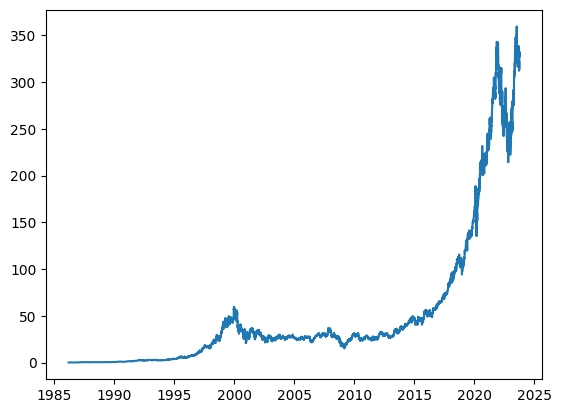

In [12]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['Close'])

In [13]:
import numpy as np

def data_to_windowed_data(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    data_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(data_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = data_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_data = pd.DataFrame({})
  ret_data['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_data[f'Target-{n-i}'] = X[:, i]
  
  ret_data['Target'] = Y

  return ret_data

# Start day second time around: '2021-03-25'
windowed_data = data_to_windowed_data(data, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_data

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [14]:
def windowed_data_to_date_X_y(windowed_dataframe):
  data_as_np = windowed_dataframe.to_numpy()

  dates = data_as_np[:, 0]

  middle_matrix = data_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = data_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_data_to_date_X_y(windowed_data)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

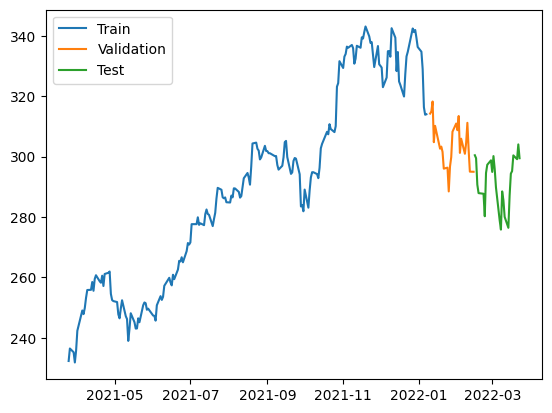

In [15]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100


2023-10-21 11:29:58.404414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-10-21 11:29:58.451093: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


7/7 [==============================] - 4s 140ms/step - loss: 84718.2266 - mean_absolute_error: 289.3261 - val_loss: 92313.1797 - val_mean_absolute_error: 303.7437
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 84343.6016 - mean_absolute_error: 288.6766 - val_loss: 91945.5391 - val_mean_absolute_error: 303.1379
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 83987.5156 - mean_absolute_error: 288.0594 - val_loss: 91570.1016 - val_mean_absolute_error: 302.5180
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 83640.0312 - mean_absolute_error: 287.4549 - val_loss: 91214.3281 - val_mean_absolute_error: 301.9294
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 83266.4766 - mean_absolute_error: 286.7988 - val_loss: 90708.0000 - val_mean_absolute_error: 301.0897
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 82701.7500 - mean_absolute_error: 285.8155 - val_loss: 89989.8281 - val_

7/7 [==============================] - 0s 3ms/step


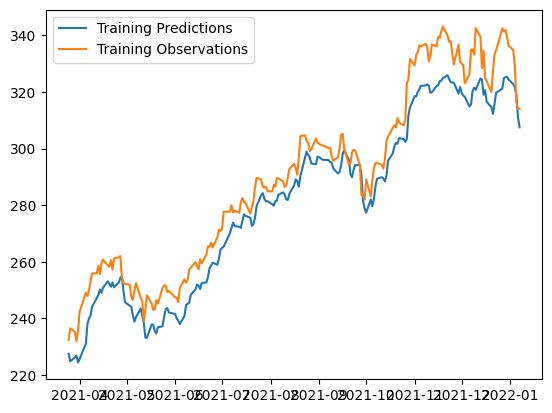

In [17]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 24ms/step


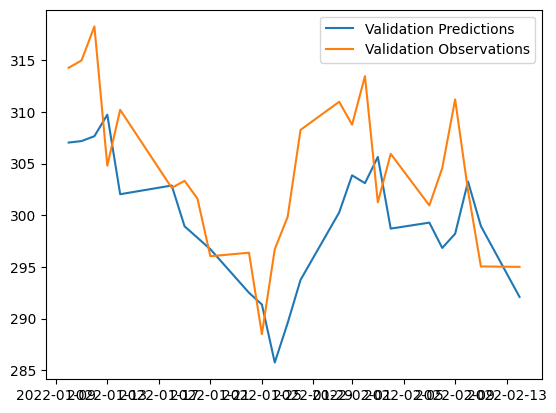

In [18]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 12ms/step


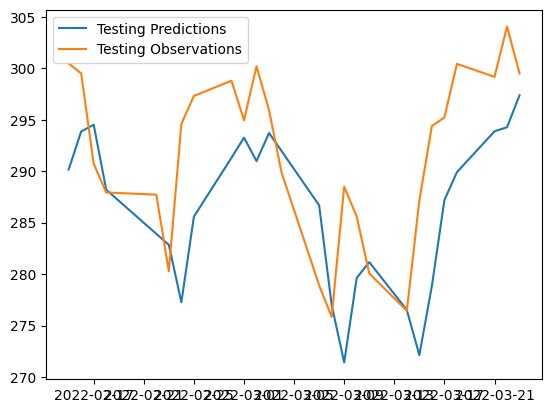

In [21]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

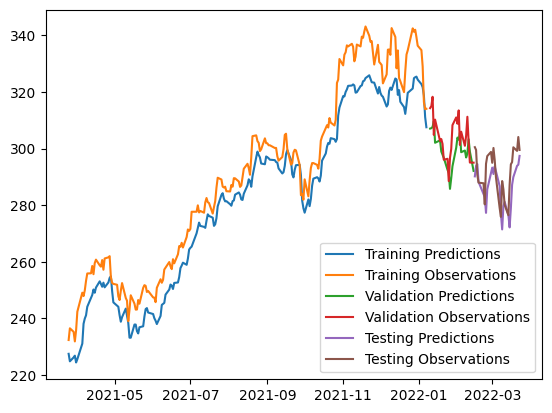

In [22]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [23]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 9ms/step


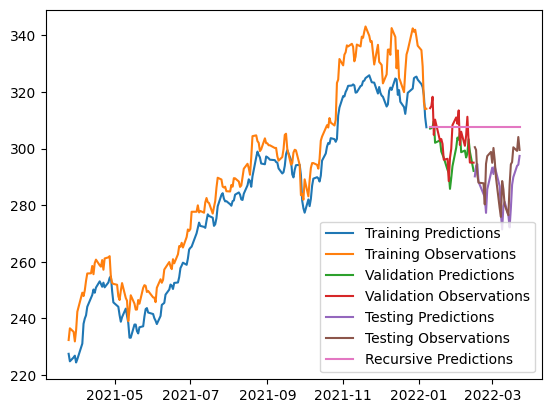

In [24]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])